# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Importing the dataset

Link: https://drive.google.com/file/d/1g5j9WzJBdGwzCLOBXKf3-kp8bvazVvc-/view

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ShapeAI DST 11021 Oct-Jan Batch 2021-22/Datasets/marketing_campaign.csv', sep='\t')

# EDA - DE, DM, DC, DV

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.isnull().sum().sum()

24

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
2073 - 1957

116

In [ ]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [ ]:
1997 - 1893

104

In [ ]:
1997 - 1996

1

In [ ]:
df['Age'] = 2017 - df['Year_Birth']

In [ ]:
df['Age'].describe()

count    2240.000000
mean       48.194196
std        11.984069
min        21.000000
25%        40.000000
50%        47.000000
75%        58.000000
max       124.000000
Name: Age, dtype: float64

In [ ]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
df.Education.replace(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'],
                     ['Undergraduate', 'Postgraduate', 'Postgraduate', 'Undergraduate', 'Undergraduate'],
                     inplace=True)

In [ ]:
df.Education.value_counts()

Undergraduate    1384
Postgraduate      856
Name: Education, dtype: int64

In [ ]:
le = LabelEncoder()

In [ ]:
df.Education = le.fit_transform(df.Education)

In [ ]:
df.Education.value_counts()

1    1384
0     856
Name: Education, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df.Marital_Status.replace(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Absurd', 'YOLO'],
                         ['Alone', 'Partner', 'Partner', 'Alone', 'Alone', 'Alone', 'Alone'],
                         inplace=True)

In [ ]:
df.Marital_Status.value_counts()

Partner    1444
Alone       796
Name: Marital_Status, dtype: int64

In [ ]:
df.Marital_Status = le.fit_transform(df.Marital_Status)

In [ ]:
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,1,0,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,60
1,1954,1,0,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,63


In [ ]:
df.drop('Year_Birth', axis=1, inplace=True)

In [ ]:
df.Income

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
# Mean
df.Income.mean()

52247.25135379061

In [ ]:
# Median
df.Income.median()

51381.5

In [ ]:
# Mode
df.Income.mode()

0    7500.0
Name: Income, dtype: float64

In [ ]:
df.Income.fillna(df.Income.median(), inplace=True)

In [ ]:
df.Income.isnull().sum()

0

In [ ]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1,0,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,60
1,1,0,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,63


In [ ]:
df['ChildrenHome'] = df.Kidhome + df.Teenhome

In [ ]:
df.ChildrenHome

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: ChildrenHome, Length: 2240, dtype: int64

In [ ]:
df.drop(['Kidhome',	'Teenhome'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome
0,1,0,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,60,0
1,1,0,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,63,2


In [ ]:
type(df.Dt_Customer[0])

str

In [ ]:
pd.DatetimeIndex(df.Dt_Customer).year

<ipython-input-50-56b4096ab740>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.DatetimeIndex(df.Dt_Customer).year


Int64Index([2012, 2014, 2013, 2014, 2014, 2013, 2012, 2013, 2013, 2014,
            ...
            2013, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2012],
           dtype='int64', name='Dt_Customer', length=2240)

In [ ]:
import datetime

In [ ]:
df.Dt_Customer = datetime.date.today().year - pd.DatetimeIndex(df.Dt_Customer).year

<ipython-input-52-3f9147a8daa6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Dt_Customer = datetime.date.today().year - pd.DatetimeIndex(df.Dt_Customer).year


In [ ]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome
0,1,0,58138.0,11,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,60,0
1,1,0,46344.0,9,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,63,2
2,1,1,71613.0,10,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,52,0
3,1,1,26646.0,9,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,33,1
4,0,1,58293.0,9,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,36,1


In [ ]:
df.Recency.describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'ChildrenHome'],
      dtype='object')

In [ ]:
df['Product_Purchased'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds'],
        axis=1,
        inplace=True)

In [ ]:
df.head(2)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome,Product_Purchased
0,1,0,58138.0,11,58,3,8,10,4,7,...,0,0,0,0,3,11,1,60,0,1617
1,1,0,46344.0,9,38,2,1,1,2,5,...,0,0,0,0,3,11,0,63,2,27


In [ ]:
df['Medium_Purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [ ]:
df.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth'],
        axis=1, inplace=True)

In [ ]:
df.head(2)

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome,Product_Purchased,Medium_Purchase
0,1,0,58138.0,11,58,0,0,0,0,0,0,3,11,1,60,0,1617,32
1,1,0,46344.0,9,38,0,0,0,0,0,0,3,11,0,63,2,27,11


In [ ]:
df.AcceptedCmp3.value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [ ]:
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [ ]:
df.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [ ]:
df.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [ ]:
df.drop(['Z_CostContact',	'Z_Revenue'], axis=1, inplace=True)

In [ ]:
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   int64  
 1   Marital_Status     2240 non-null   int64  
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   int64  
 4   Recency            2240 non-null   int64  
 5   AcceptedCmp3       2240 non-null   int64  
 6   AcceptedCmp4       2240 non-null   int64  
 7   AcceptedCmp5       2240 non-null   int64  
 8   AcceptedCmp1       2240 non-null   int64  
 9   AcceptedCmp2       2240 non-null   int64  
 10  Complain           2240 non-null   int64  
 11  Response           2240 non-null   int64  
 12  Age                2240 non-null   int64  
 13  ChildrenHome       2240 non-null   int64  
 14  Product_Purchased  2240 non-null   int64  
 15  Medium_Purchase    2240 non-null   int64  
dtypes: float64(1), int64(15)

# Feature Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_df = scaler.fit_transform(df)

In [ ]:
scaled_df

array([[1.        , 0.        , 0.08483222, ..., 0.        , 0.63968254,
        0.69565217],
       [1.        , 0.        , 0.06709518, ..., 0.66666667, 0.00873016,
        0.23913043],
       [1.        , 1.        , 0.10509733, ..., 0.        , 0.30595238,
        0.54347826],
       ...,
       [1.        , 0.        , 0.08309221, ..., 0.        , 0.49047619,
        0.54347826],
       [0.        , 1.        , 0.10153609, ..., 0.33333333, 0.33253968,
        0.56521739],
       [0.        , 1.        , 0.07690815, ..., 0.66666667, 0.06626984,
        0.39130435]])

In [ ]:
scaled_df[0]

array([1.        , 0.        , 0.08483222, 1.        , 0.58585859,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.37864078, 0.        , 0.63968254,
       0.69565217])

In [ ]:
df.iloc[0]

Education                1.0
Marital_Status           0.0
Income               58138.0
Dt_Customer             11.0
Recency                 58.0
AcceptedCmp3             0.0
AcceptedCmp4             0.0
AcceptedCmp5             0.0
AcceptedCmp1             0.0
AcceptedCmp2             0.0
Complain                 0.0
Response                 1.0
Age                     60.0
ChildrenHome             0.0
Product_Purchased     1617.0
Medium_Purchase         32.0
Name: 0, dtype: float64

In [ ]:
sse = []

for i in range(1,12):
  Kmodel = KMeans(n_clusters=i, n_init=15)
  Kmodel.fit(df)
  sse.append(Kmodel.inertia_)

In [ ]:
sse

[1404441805350.6606,
 681179464717.3179,
 326106929091.8828,
 183350632905.91302,
 124214349518.38297,
 83000061034.07837,
 53620098404.39019,
 40868376823.69678,
 31134123249.539238,
 24202339795.961967,
 19090398695.94175]

Text(0.5, 1.0, 'Elbow Plot')

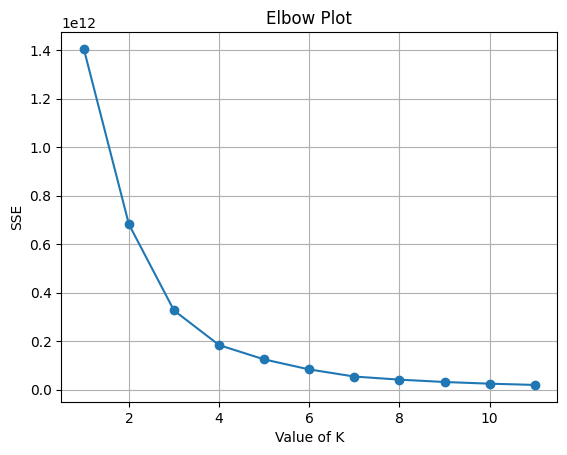

In [ ]:
plt.plot(range(1,12), sse, marker='o')
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.title('Elbow Plot')

In [ ]:
K = 7

In [ ]:
Kmodel = KMeans(n_clusters=K, n_init=15)

In [ ]:
Kmodel.fit(df)

KMeans(n_clusters=7, n_init=15)

In [ ]:
predict = Kmodel.predict(df)

In [ ]:
df['Cluster'] = predict

In [ ]:
df.head(10)

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,ChildrenHome,Product_Purchased,Medium_Purchase,Cluster
0,1,0,58138.0,11,58,0,0,0,0,0,0,1,60,0,1617,32,4
1,1,0,46344.0,9,38,0,0,0,0,0,0,0,63,2,27,11,4
2,1,1,71613.0,10,26,0,0,0,0,0,0,0,52,0,776,25,3
3,1,1,26646.0,9,26,0,0,0,0,0,0,0,33,1,53,14,5
4,0,1,58293.0,9,94,0,0,0,0,0,0,0,36,1,422,24,4
5,0,1,62513.0,10,16,0,0,0,0,0,0,0,50,1,716,28,3
6,1,0,55635.0,11,34,0,0,0,0,0,0,0,46,1,590,27,4
7,0,1,33454.0,10,32,0,0,0,0,0,0,0,32,1,169,18,1
8,0,1,30351.0,10,19,0,0,0,0,0,0,1,43,1,46,15,1
9,0,1,5648.0,9,68,1,0,0,0,0,0,0,67,2,49,22,5


In [ ]:
df.Cluster.value_counts()

1    522
4    505
3    500
0    363
5    342
6      7
2      1
Name: Cluster, dtype: int64

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
var = linkage(df)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [20.0, 20.0, 47.5, 47.5],
  [95.0, 95.0, 105.0, 105.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [300.0, 300.0, 323.75, 323.75],
  [272.5, 272.5, 311.875, 311.875],
  [242.5, 242.5, 292.1875, 292.1875],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [267.34375, 267.34375, 362.5, 362.5],
  [225.0, 225.0, 314.921875, 314.921875],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 41

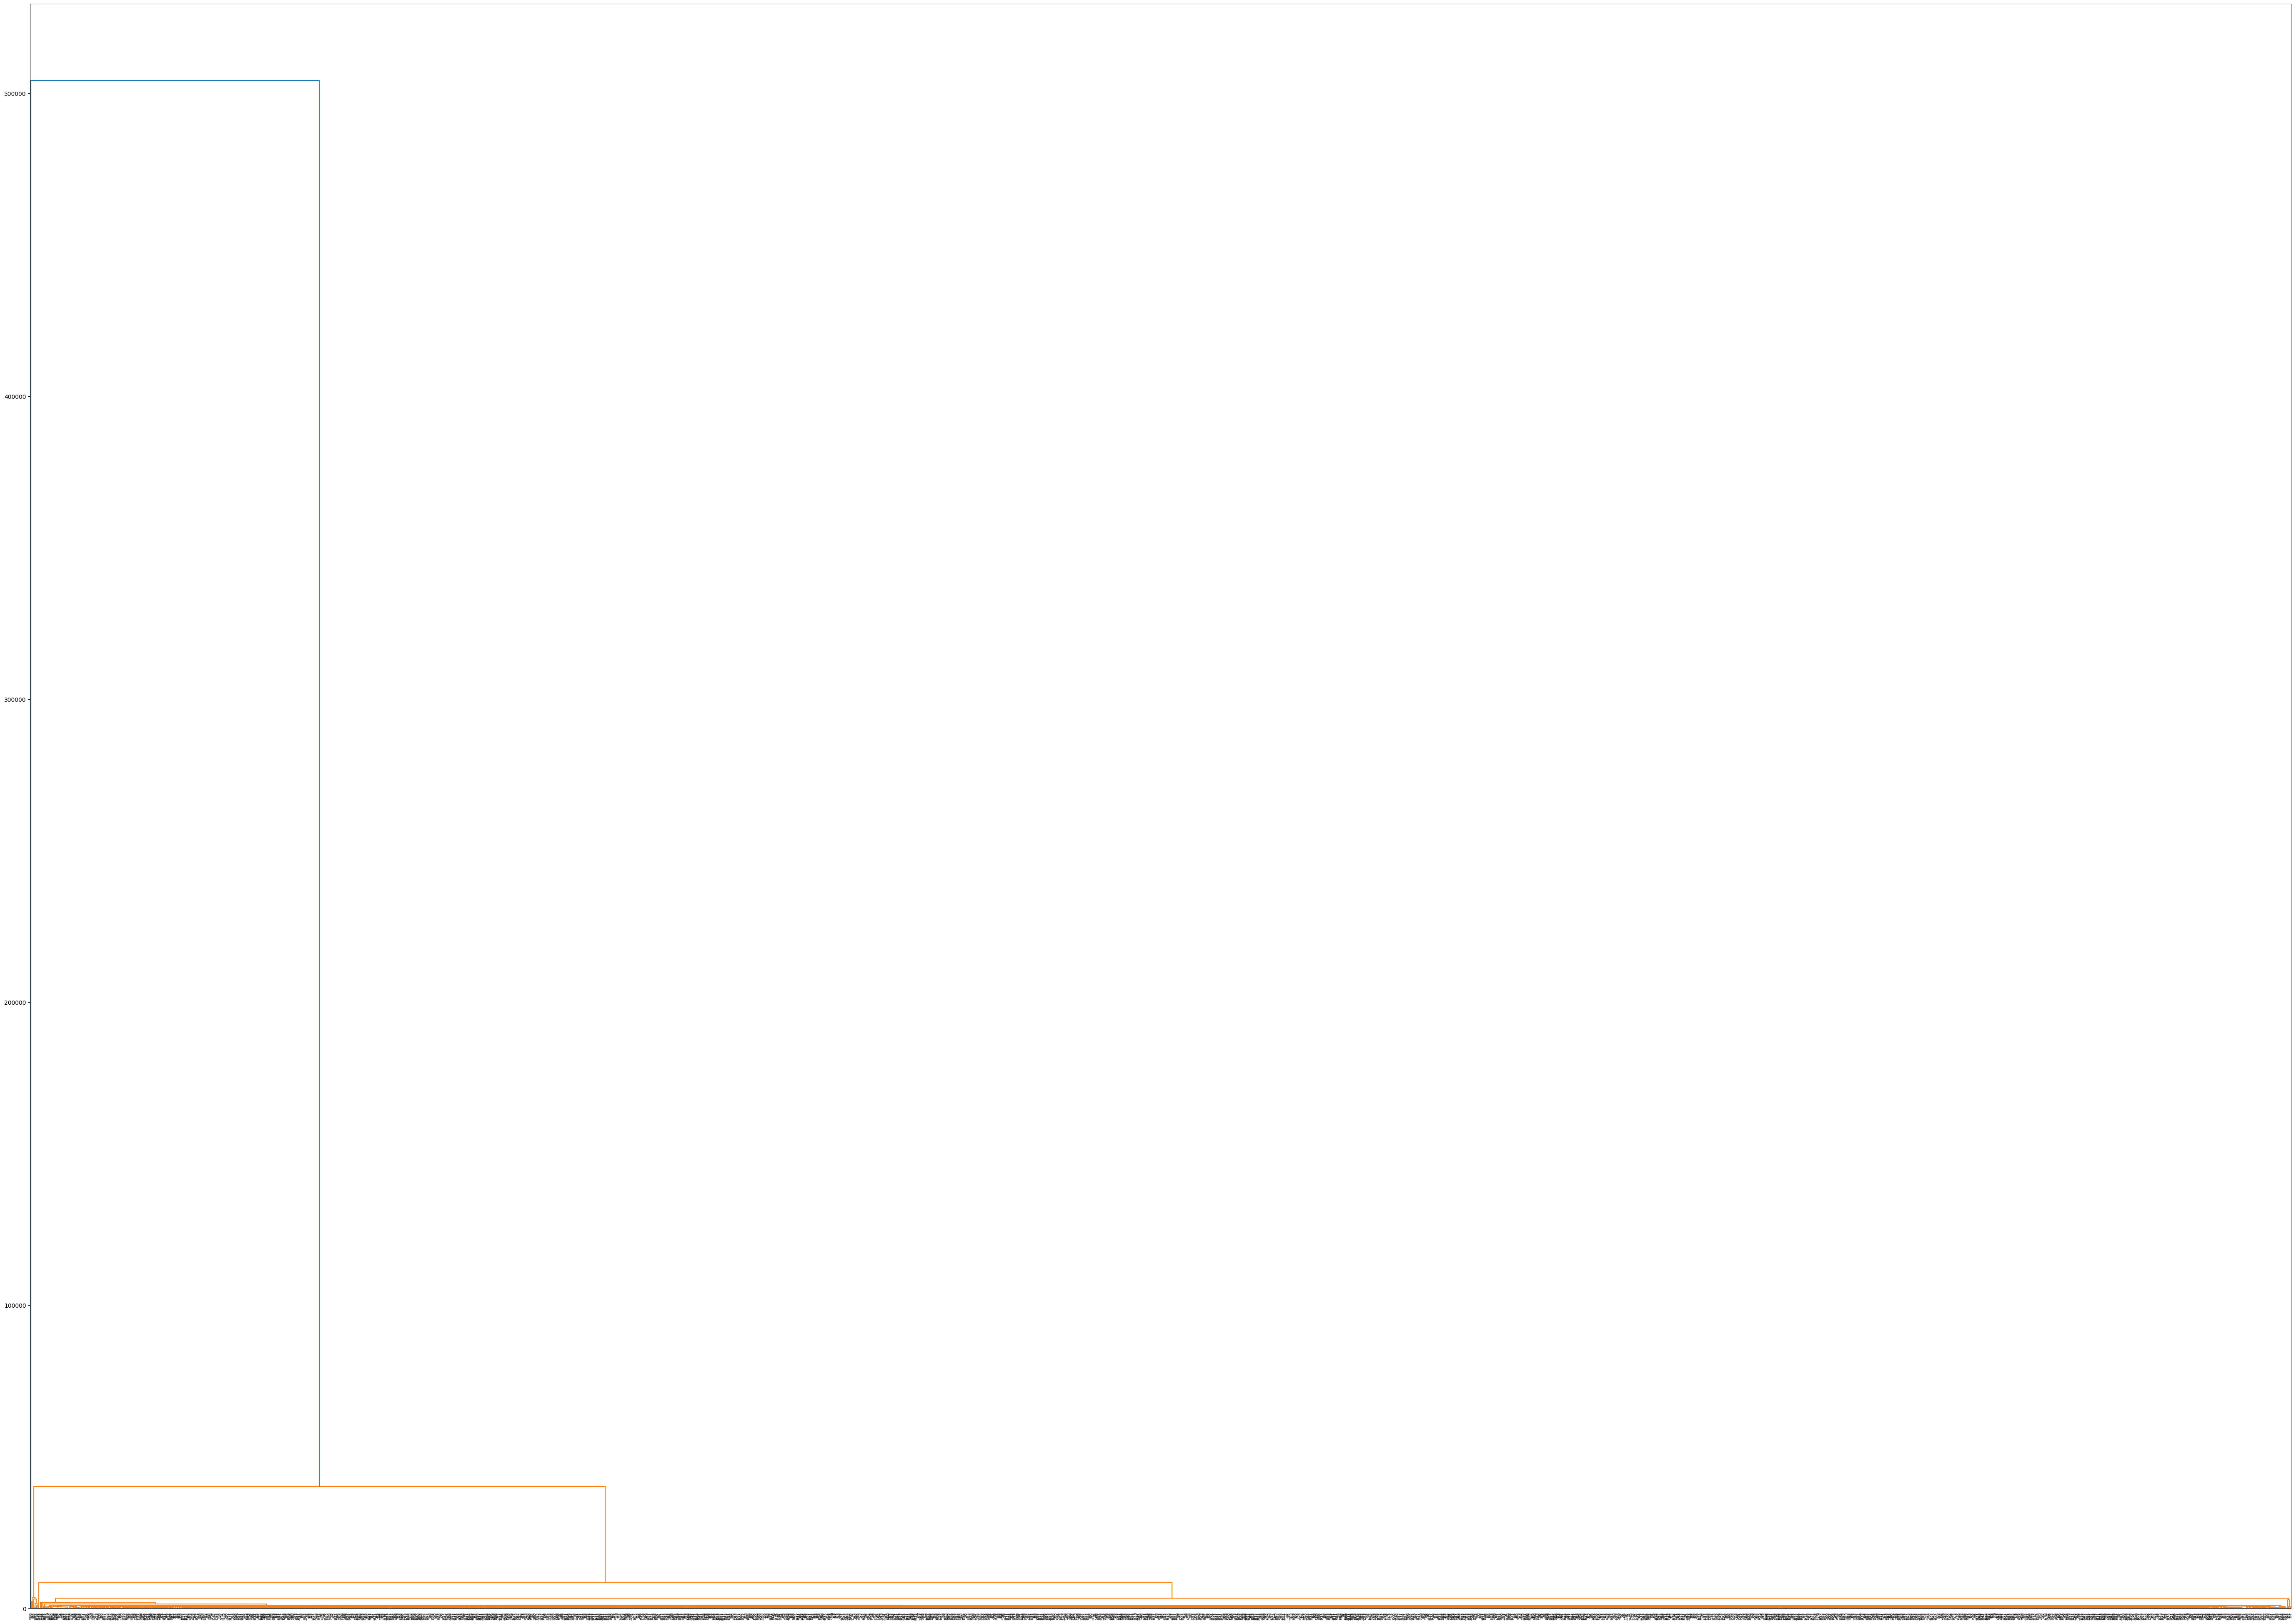

In [ ]:
plt.figure(figsize=(70,50))
dendrogram(var)